In [6]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
from pathlib import Path

In [7]:
DATA_PATH = Path("data_2013")

In [8]:
raw = mne.io.read_raw_edf(DATA_PATH / "SC4001E0-PSG.edf", preload=True)

Extracting EDF parameters from C:\Users\jjm\Desktop\Git_store\medical\example\1_library\data_2013\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


In [9]:
label = np.load(DATA_PATH / "SC4001EC-Hypnogram.npy")

In [10]:
print(len(label))
print(len(raw) // (100 * 30))

2650
2650


In [11]:
print(raw)
print(raw.info)
print(raw.ch_names)

<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 100.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>
['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


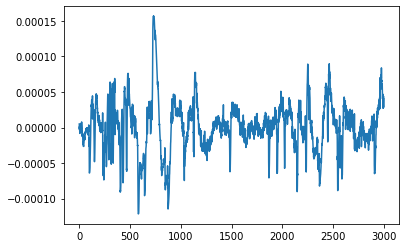

In [12]:
plt.plot(raw['EEG Fpz-Cz'][0][0][:3000])

In [13]:
raw.filter(0.1, 40)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3301 samples (33.010 sec)



<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>

In [14]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 40.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
>

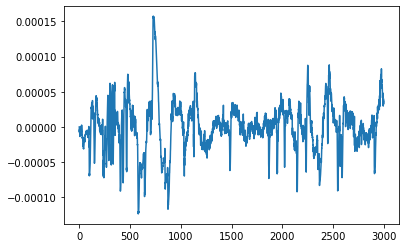

In [15]:
plt.plot(raw['EEG Fpz-Cz'][0][0][:3000])

In [132]:
raw.pick_channels(['EEG Fpz-Cz', 'EEG Pz-Oz'])

<RawEDF | SC4001E0-PSG.edf, 2 x 7950000 (79500.0 s), ~121.3 MB, data loaded>

In [133]:
print(raw)
print(raw.info)
print(raw.ch_names)

<RawEDF | SC4001E0-PSG.edf, 2 x 7950000 (79500.0 s), ~121.3 MB, data loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz
 chs: 2 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 40.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 2
 projs: []
 sfreq: 100.0 Hz
>
['EEG Fpz-Cz', 'EEG Pz-Oz']


In [134]:
sp = yasa.spindles_detect(raw, 
                          100, 
                          ch_names=['EEG Fpz-Cz', 'EEG Pz-Oz'],
                          multi_only=False)

In [135]:
sp.summary()

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,31017.74,31018.07,31018.32,0.58,66.402851,12.367574,2.126348,0.251638,13.542439,8.0,0.559322,EEG Fpz-Cz,0
1,31140.87,31141.17,31141.39,0.52,56.794842,14.898809,2.454069,0.289398,13.161340,7.0,0.566038,EEG Fpz-Cz,0
2,31220.72,31221.20,31221.67,0.95,70.773455,14.943469,2.255735,0.357763,12.691625,11.0,0.500000,EEG Fpz-Cz,0
3,32047.76,32048.26,32048.68,0.92,56.831450,13.286343,2.179332,0.343523,12.613051,12.0,0.537634,EEG Fpz-Cz,0
4,32479.66,32480.13,32480.28,0.62,54.393092,12.376970,2.303017,0.363245,12.812573,8.0,0.746032,EEG Fpz-Cz,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,74939.49,74939.96,74940.16,0.67,25.749924,5.614390,1.276595,0.258225,13.398022,8.0,0.691176,EEG Pz-Oz,1
190,75498.57,75498.72,75499.18,0.61,38.027553,6.773918,1.557049,0.238269,13.482218,8.0,0.241935,EEG Pz-Oz,1
191,76904.35,76905.03,76905.24,0.89,37.847443,6.637170,1.462158,0.237527,12.560048,10.0,0.755556,EEG Pz-Oz,1
192,77660.13,77660.40,77660.71,0.58,19.006819,3.987858,1.035252,0.269683,13.297721,7.0,0.457627,EEG Pz-Oz,1


In [136]:
sp.summary(grp_chan=True, aggfunc='mean')

,Count,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry
Channel,,,,,,,,,
EEG Fpz-Cz,110,0.763818,42.943850,9.702591,1.934001,0.345868,12.899827,9.609091,0.491918
EEG Pz-Oz,84,0.705833,30.787542,6.481049,1.465479,0.293246,13.001758,8.773810,0.522988


In [137]:
mask = sp.get_mask()
print(mask.sum(1))
mask

[8521 6019]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [153]:
print(len(label))
print(len(raw) // (100 * 30))

2650
2650


In [154]:
total_len = len(raw)

In [139]:
times = np.arange(7950000)

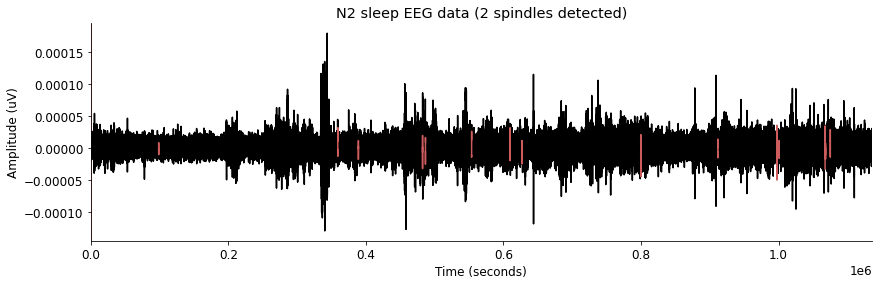

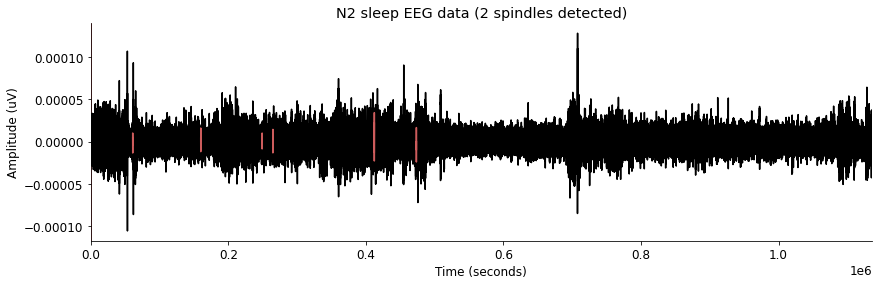

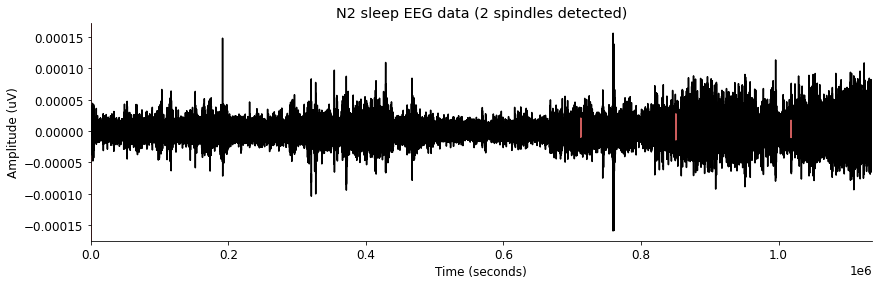

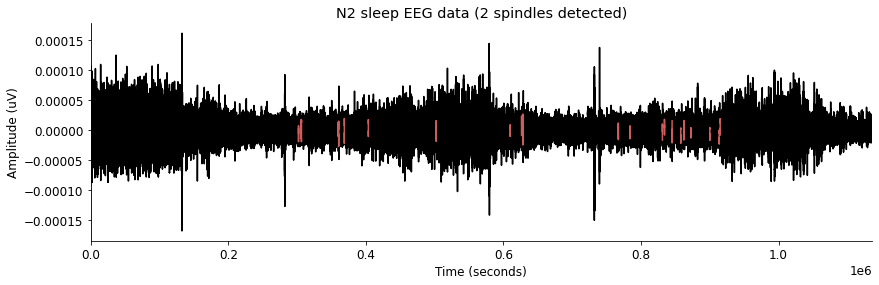

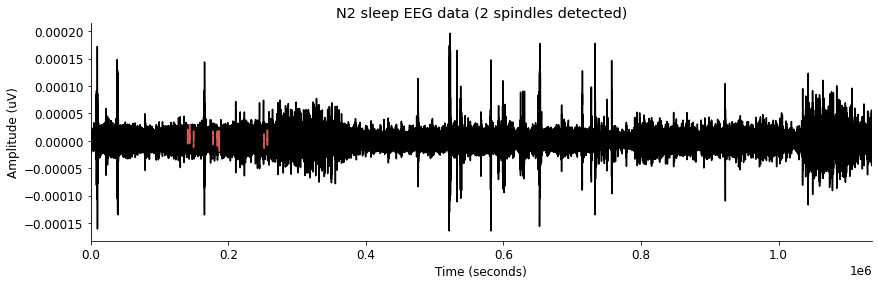

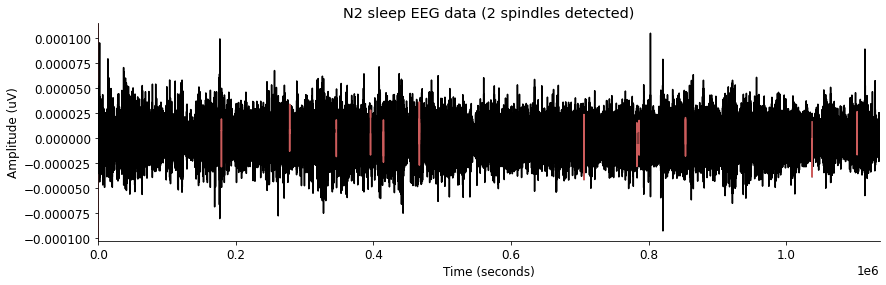

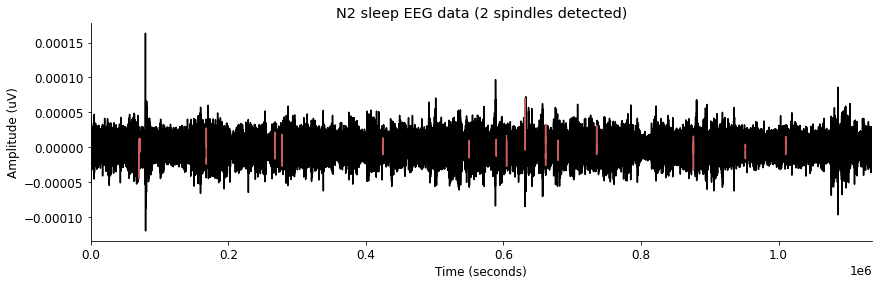

In [223]:
data = raw['EEG Pz-Oz'][0][0]

spindles_highlight = data * mask[1]
spindles_highlight[spindles_highlight == 0] = np.nan

split = 7

split_len = total_len // split

for i in range(0, split):
    start = i * split_len
    end = (i + 1) * split_len
    
    plt.figure(figsize=(14, 4))
    plt.plot(times[0:split_len], data[start:end], 'k')
    plt.plot(times[0:split_len], spindles_highlight[start:end], 'indianred')
    plt.axvspan(3, 6, color='red', alpha=0.5)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude (uV)')
    plt.xlim([0, times[0:split_len][-1]])
    plt.title('N2 sleep EEG data (2 spindles detected)')
    sns.despine()

In [218]:
temp_label = []

for i in label:
    for j in range(0, 3000):
        temp_label.append(i)
        
temp_label = np.array(temp_label)
temp_label[~(temp_label == 2)] = 0 

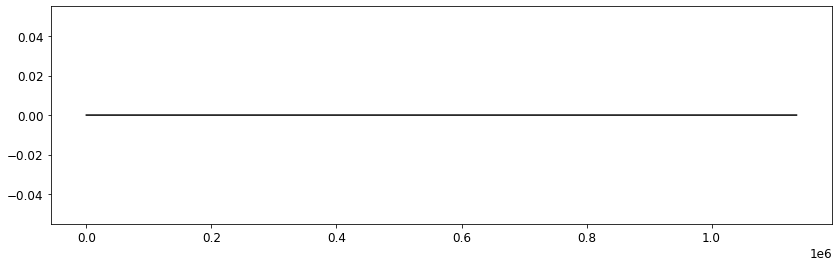

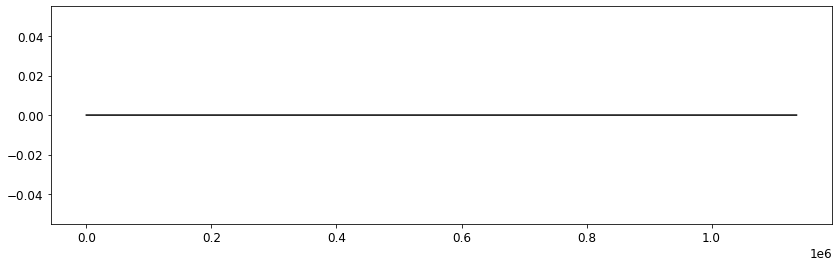

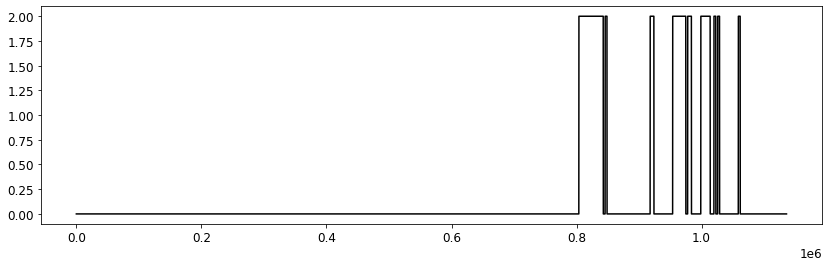

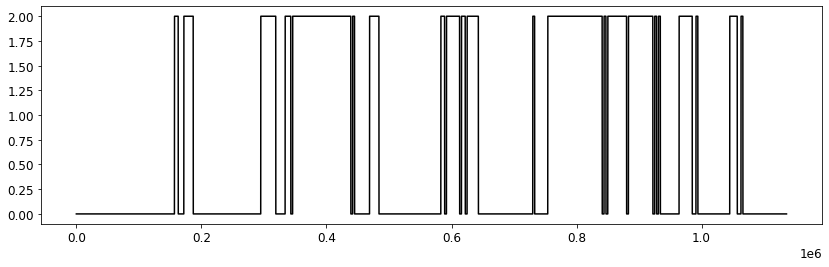

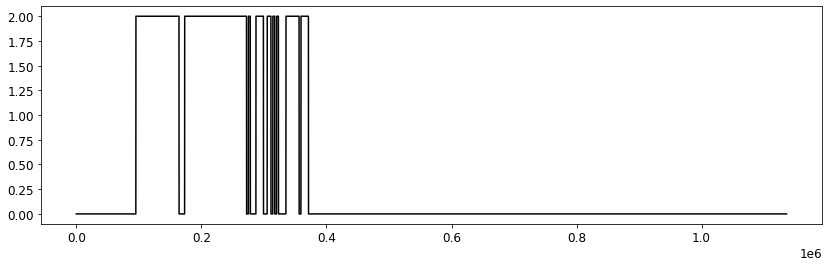

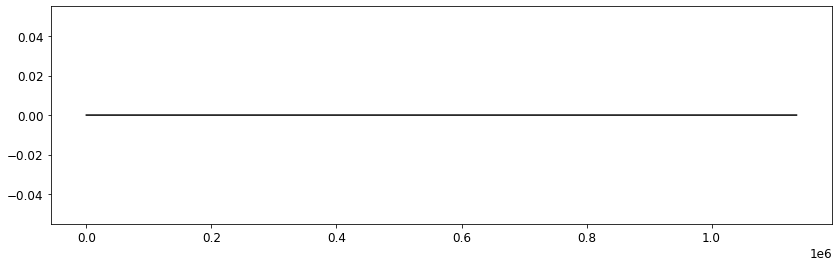

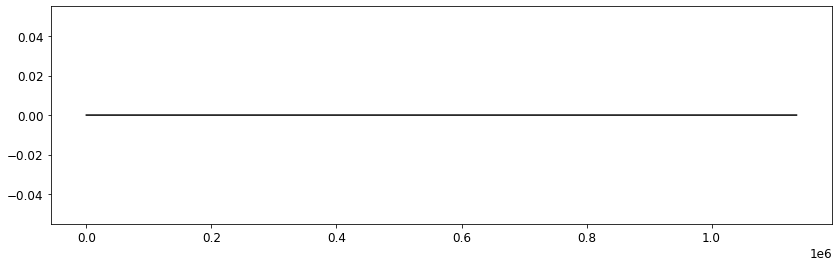

In [219]:
split = 7

split_len = total_len // split

for i in range(0, split):
    start = i * split_len
    end = (i + 1) * split_len
    
    plt.figure(figsize=(14, 4))
    plt.plot(times[0:split_len], temp_label[start:end], 'k')
    plt.show()

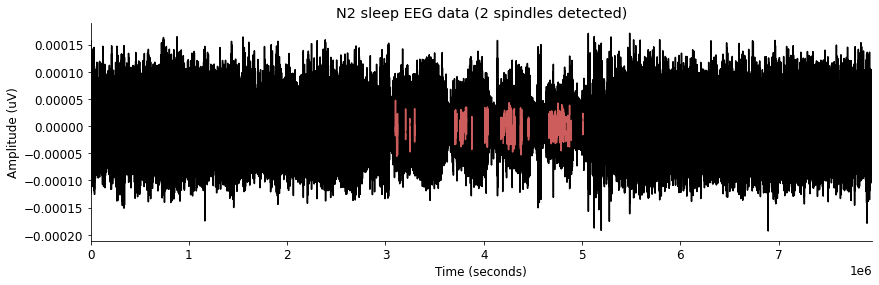

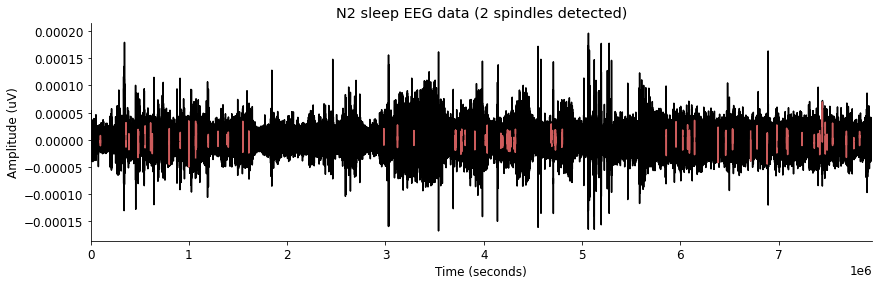

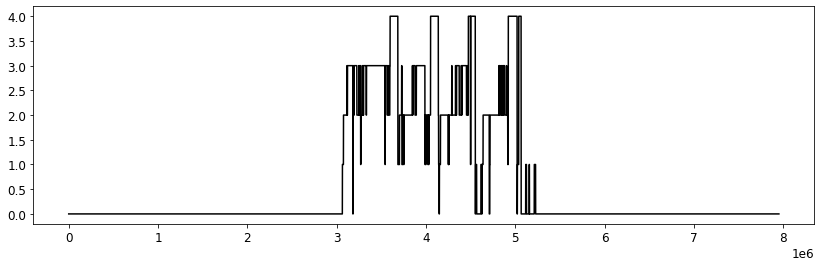

In [177]:
data = raw['EEG Fpz-Cz'][0][0]

spindles_highlight = data * mask[0]
spindles_highlight[spindles_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data, 'k')
plt.plot(times, spindles_highlight, 'indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('N2 sleep EEG data (2 spindles detected)')
sns.despine()
plt.show()

data = raw['EEG Pz-Oz'][0][0]

spindles_highlight = data * mask[1]
spindles_highlight[spindles_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data, 'k')
plt.plot(times, spindles_highlight, 'indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('N2 sleep EEG data (2 spindles detected)')
sns.despine()
plt.show()